<a href="https://colab.research.google.com/github/brandon-setegn/fta-724-machine-learning-ai/blob/master/Module_7_ML_REAL_ESTATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background:

This activity will explore other machine learning models that can be used to examine real estate data. The housing dataset we explore contains aggregated data regarding districts in California, obtained from the StatLib repository (https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html).

The target variable is the median house value (**MedHouseVal**) for California districts, expressed in hundreds of thousands of dollars ($100,000). The values are capped at \$500,00. This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.

The following attributes are included in data:

- **MedInc:** median income in block group
- **HouseAge:** median house age in block group
- **AveRooms:** average number of rooms per household
- **AveBedrms:** average number of bedrooms per household
- **Population:** block group population
- **AveOccup:** average number of household members
- **Latitude:** block group latitude
- **Longitude:** block group longitude

Let's have a close look at these features in order to use them in a predictive model.

In [ ]:
#let's import the libraries we are going to need
import os, csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
#%matplotlib notebook
%matplotlib inline

In [ ]:
#let's connect to the drive and import data
os.chdir('/content/drive/MyDrive/WWFU_FTA_724')
df = pd.read_csv('module_7_housing.csv',index_col=False)

### **Overview of the entire dataset**

In [ ]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [ ]:
#dimensionality
df.shape

(20640, 9)

In [ ]:
df['HouseAge'].value_counts()

52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: HouseAge, dtype: int64

In [ ]:
df['Latitude'].value_counts()

34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.01      1
41.36      1
41.13      1
40.30      1
35.88      1
Name: Latitude, Length: 862, dtype: int64

In [ ]:
df['Longitude'].value_counts()

-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-123.54      1
-115.94      1
-115.99      1
-116.81      1
-123.71      1
Name: Longitude, Length: 844, dtype: int64

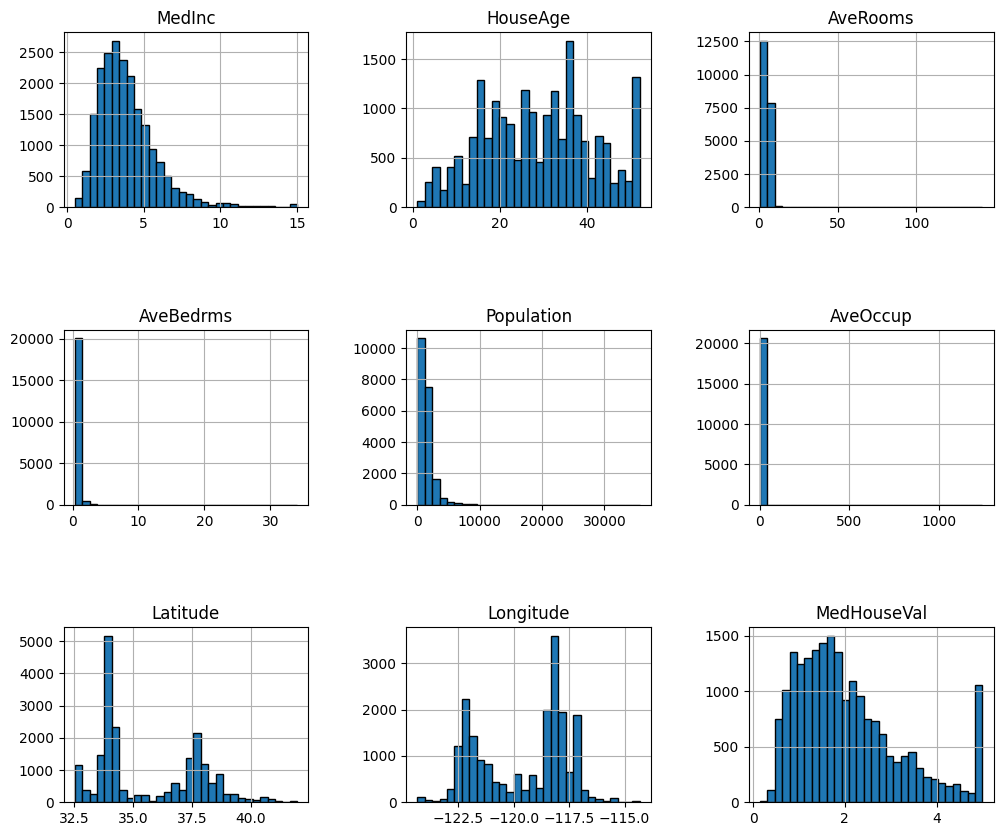

In [ ]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population","MedHouseVal"]
df[features_of_interest].describe()

AveRooms     AveBedrms      AveOccup    Population   MedHouseVal
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000
mean       5.429000      1.096675      3.070655   1425.476744      2.068558
std        2.474173      0.473911     10.386050   1132.462122      1.153956
min        0.846154      0.333333      0.692308      3.000000      0.149990
25%        4.440716      1.006079      2.429741    787.000000      1.196000
50%        5.229129      1.048780      2.818116   1166.000000      1.797000
75%        6.052381      1.099526      3.282261   1725.000000      2.647250
max      141.909091     34.066667   1243.333333  35682.000000      5.000010

### Examining outliers

In [ ]:
df[df["AveBedrms"]==np.max(df["AveBedrms"])]

MedInc  HouseAge    AveRooms  AveBedrms  Population  AveOccup  Latitude  \
1979   4.625      34.0  132.533333  34.066667        36.0       2.4      38.8   

      Longitude  MedHouseVal  
1979    -120.08        1.625

In [ ]:
df[df["AveRooms"]==np.max(df["AveRooms"])]

MedInc  HouseAge    AveRooms  AveBedrms  Population  AveOccup  Latitude  \
1914   1.875      33.0  141.909091  25.636364        30.0  2.727273     38.91   

      Longitude  MedHouseVal  
1914     -120.1      5.00001

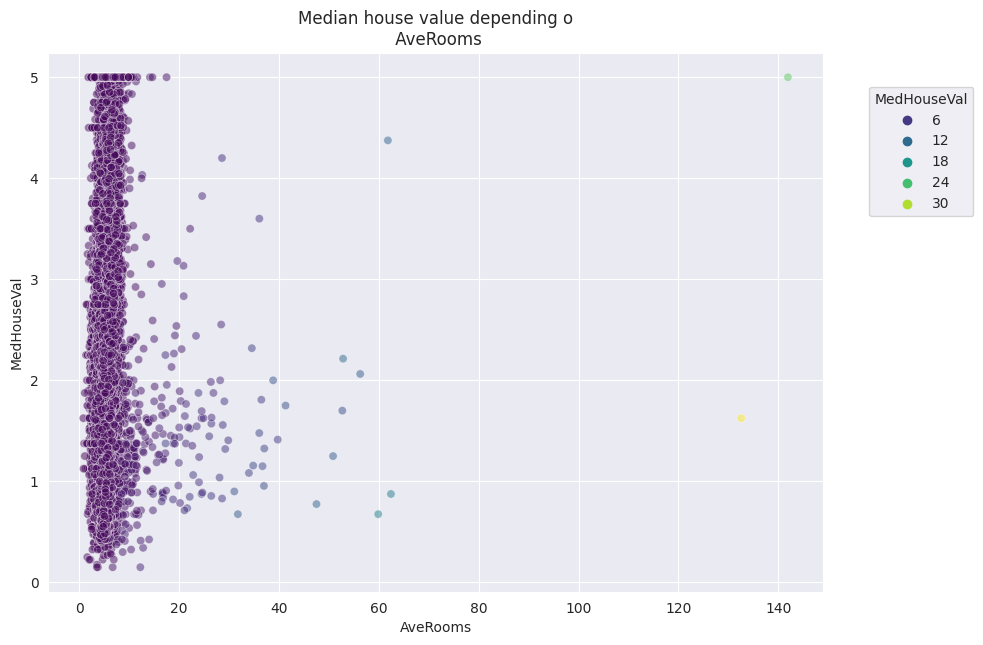

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')

sns.scatterplot(
    data=df,
    x="AveRooms",
    y="MedHouseVal",
    hue="AveBedrms",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending o\n AveRooms")

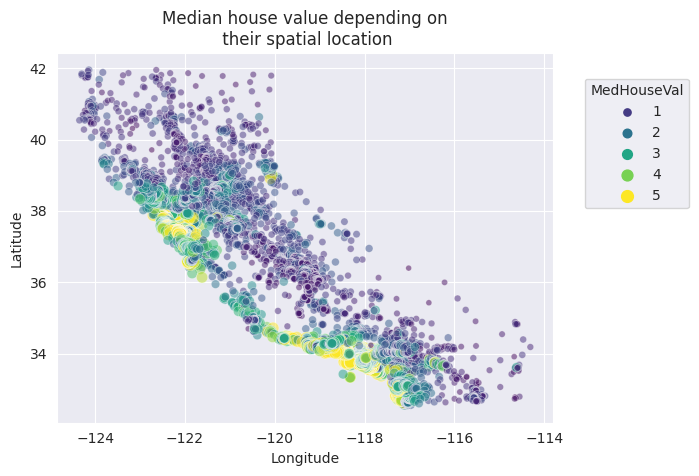

In [ ]:
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending on\n their spatial location")

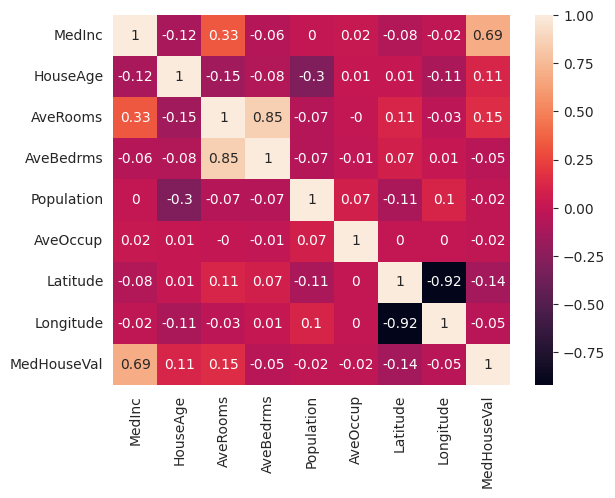

In [ ]:
corr = df.corr().round(2)
sns.heatmap(corr,annot=True);

Let's investigate univariate relationship between median house value "MedHouseVal" and attributes "MedInc", "HouseAge",	"AveRooms",	"AveBedrms","Population", and	"AveOccup".

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
px.scatter(data_frame=df,x='MedInc',y='MedHouseVal',trendline='ols')

<Figure size 1000x700 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
px.scatter(data_frame=df,x='HouseAge',y='MedHouseVal',trendline='ols')

<Figure size 1000x700 with 0 Axes>

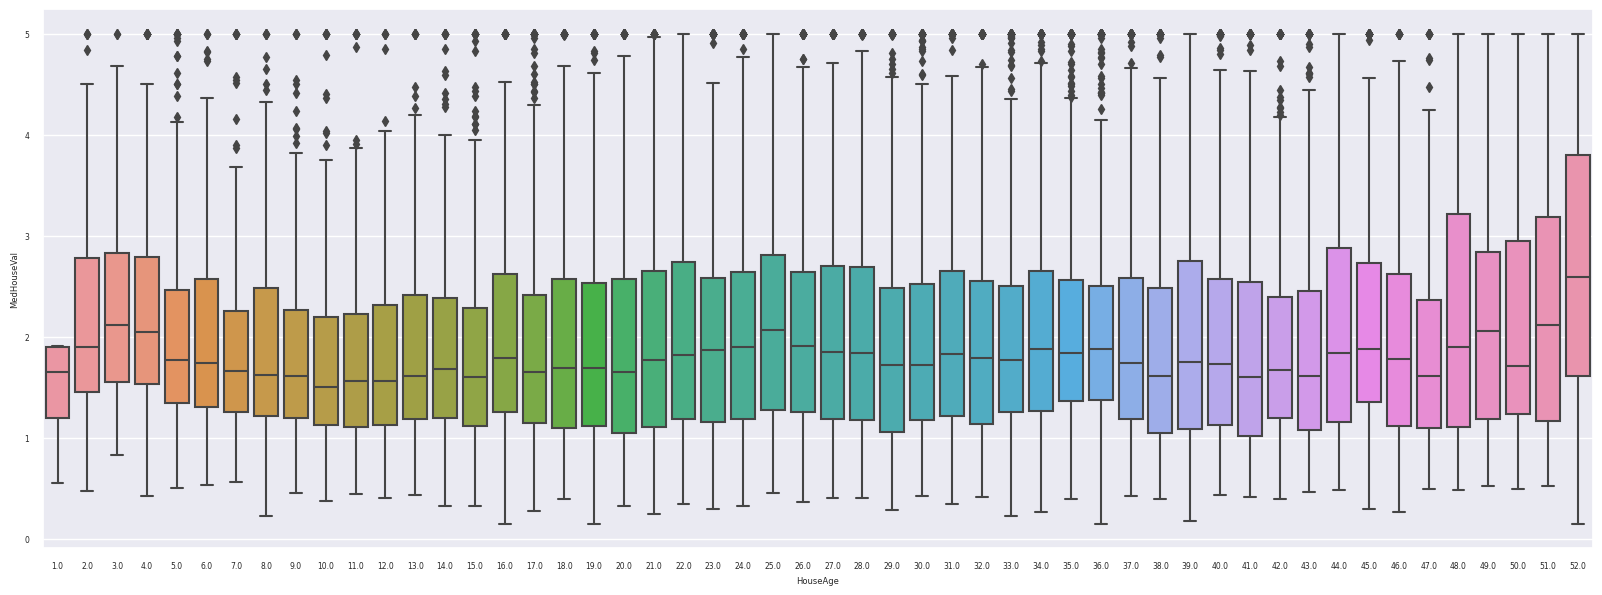

In [ ]:
plt.figure(figsize=(20,7))
sns.set_style('darkgrid')
sns.set(font_scale=0.5)
sns.boxplot(data=df,x='HouseAge',y='MedHouseVal');

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
px.scatter(data_frame=df,x='AveRooms',y='MedHouseVal',trendline='ols')

<Figure size 1000x700 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
px.scatter(data_frame=df,x='AveBedrms',y='MedHouseVal',trendline='ols')

<Figure size 1000x700 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
px.scatter(data_frame=df,x='Population',y='MedHouseVal',trendline='ols')

<Figure size 1000x700 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
px.scatter(data_frame=df,x='AveOccup',y='MedHouseVal',trendline='ols')

<Figure size 1000x700 with 0 Axes>

### **Machine Learning**

Let's develop some models. First randomly split data into two portions, training and test samples. Here, we use approximately 80% of total data for training and the remaining 20% data for testing. We are predicting median house price "MedHouseVal" using other variables.


In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.metrics import *
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# Let's define a universal evaluation metric for simplicity
def eval_metrics(model,sample,y_true,y_pred):
  rmse = np.round(mean_squared_error(y_true,y_pred),3) #root mean squared error
  mae = np.round(mean_absolute_error(y_true,y_pred),3) #mean absolute error
  max_e = np.round(max_error(y_true,y_pred),3) #maximum error
  rsq = np.round(r2_score(y_true,y_pred),3) #r-squared
  metrics_df = {'model':[model],'sample':[sample],'rmse':[rmse],'mae':[mae],'max_e':[max_e],'r2':[rsq]}
  return pd.DataFrame(data = metrics_df)

In [ ]:
X = df.drop('MedHouseVal',axis=1)
y = df.MedHouseVal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [ ]:
X_train.shape[0]/len(X)

0.8

**Linear Regression**

In [ ]:
ols = LinearRegression()
ols.fit(X_train,y_train)

ols_pred_tr = ols.predict(X_train)
ols_pred_te = ols.predict(X_test)

#Evaluation metrics
pd.concat([eval_metrics('ols','train',y_train,ols_pred_tr),
           eval_metrics('ols','test',y_test,ols_pred_te)],
          ignore_index=True, axis=0)

model sample   rmse    mae  max_e     r2
0   ols  train  0.520  0.529  4.529  0.609
1   ols   test  0.546  0.534  9.665  0.590

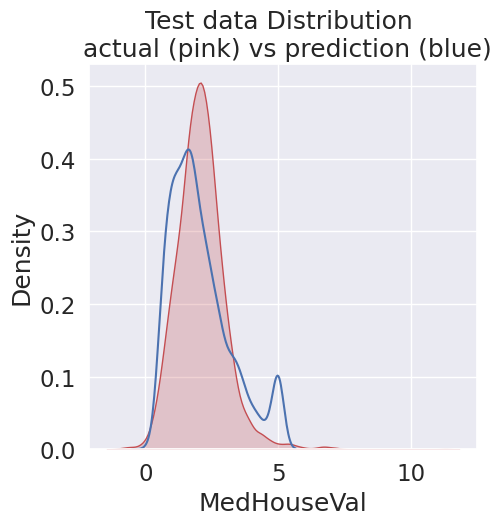

In [ ]:
# test sample distribution actual vs prediction
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.kdeplot(y_test,color='b')
sns.kdeplot(ols_pred_te,shade=True,color='r')
#plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
plt.title("Test data Distribution \n actual (pink) vs prediction (blue)");

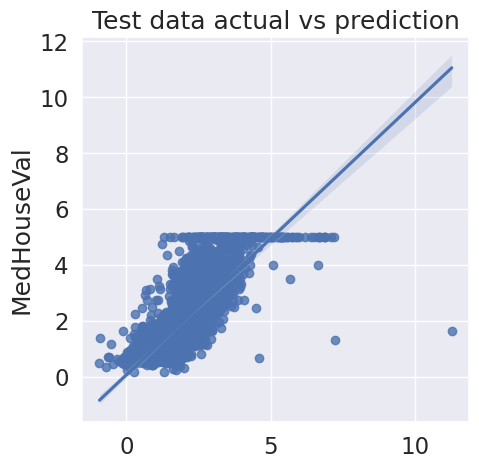

In [ ]:
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.regplot(y=y_test,x=ols_pred_te)
plt.title("Test data actual vs prediction");

**Decision tree**

In [ ]:
dt = DecisionTreeRegressor(max_depth=7,random_state=123)
dt.fit(X_train,y_train)

dt_pred_tr = dt.predict(X_train)
dt_pred_te = dt.predict(X_test)

pd.concat([eval_metrics('dt','train',y_train,dt_pred_tr),
           eval_metrics('dt','test',y_test,dt_pred_te)],
          ignore_index=True, axis=0)

model sample   rmse    mae  max_e     r2
0    dt  train  0.382  0.441  3.867  0.713
1    dt   test  0.448  0.476  4.173  0.663

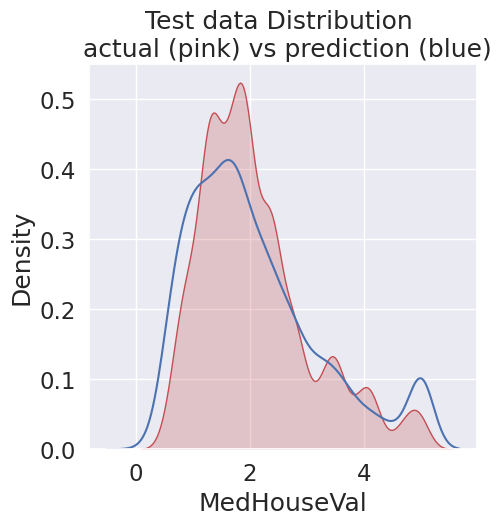

In [ ]:
# test sample distribution actual vs prediction
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.kdeplot(y_test,color='b')
sns.kdeplot(dt_pred_te,shade=True,color='r')
plt.title("Test data Distribution \n actual (pink) vs prediction (blue)");

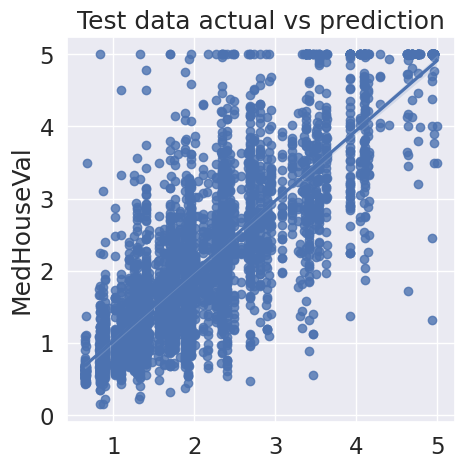

In [ ]:
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.regplot(y=y_test,x=dt_pred_te)
plt.title("Test data actual vs prediction");

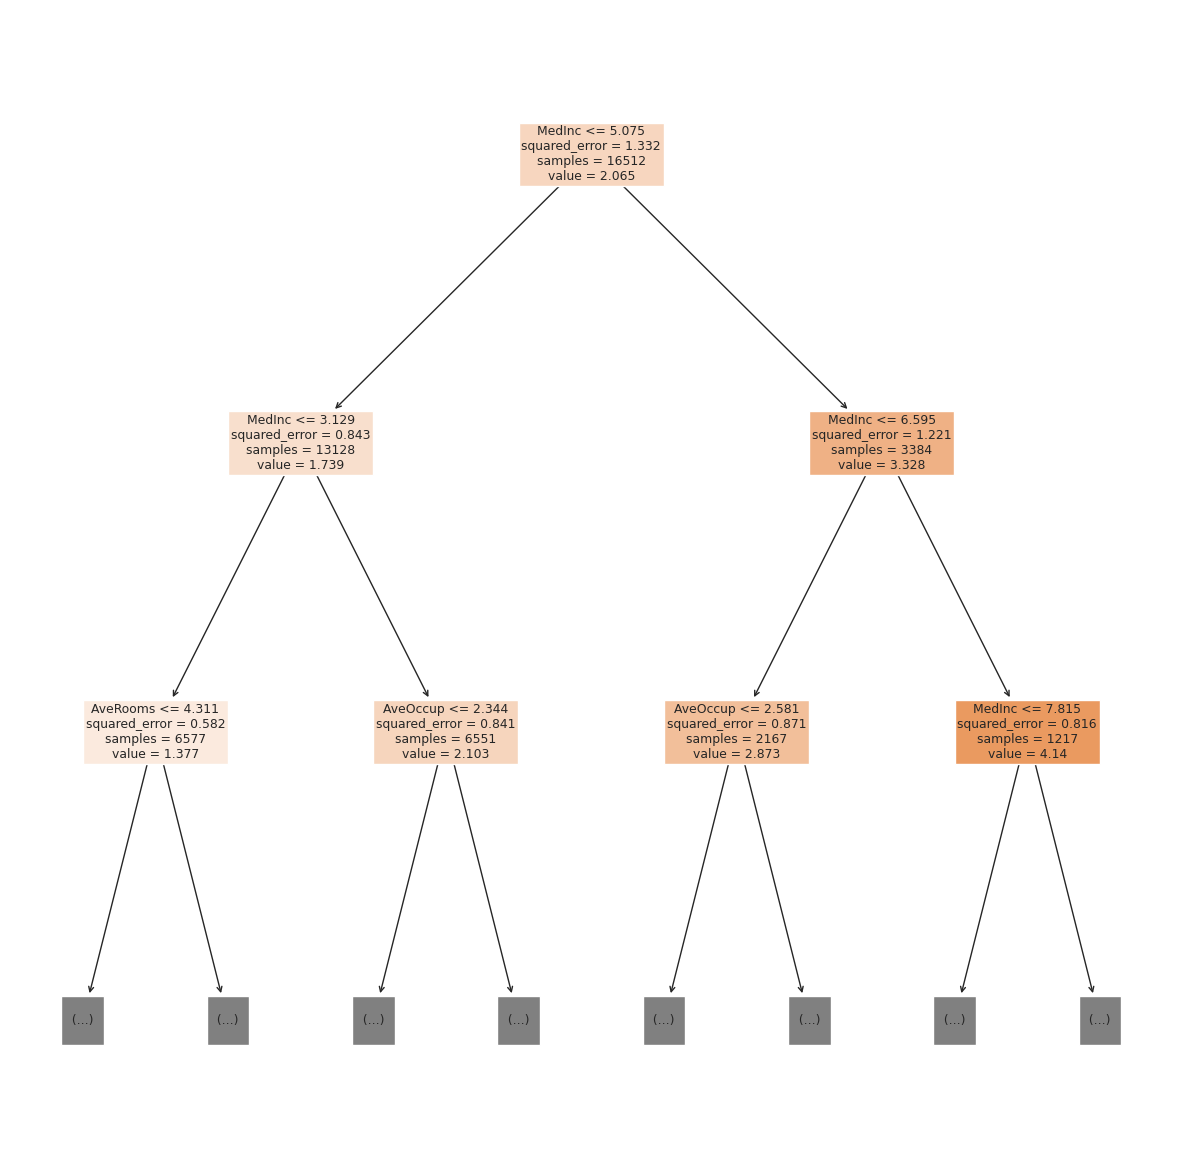

In [ ]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(dt,feature_names=X_train.columns,filled=True, max_depth=2);

**Random Forest**

In [ ]:
rf = RandomForestRegressor(n_estimators=200,max_depth=7,min_samples_leaf=20,random_state=123)
rf.fit(X_train,y_train)

rf_pred_tr = rf.predict(X_train)
rf_pred_te = rf.predict(X_test)

pd.concat([eval_metrics('rf','train',y_train,rf_pred_tr),
           eval_metrics('rf','test',y_test,rf_pred_te)],
          ignore_index=True, axis=0)

model sample   rmse    mae  max_e     r2
0    rf  train  0.333  0.407  3.517  0.750
1    rf   test  0.374  0.432  4.006  0.719

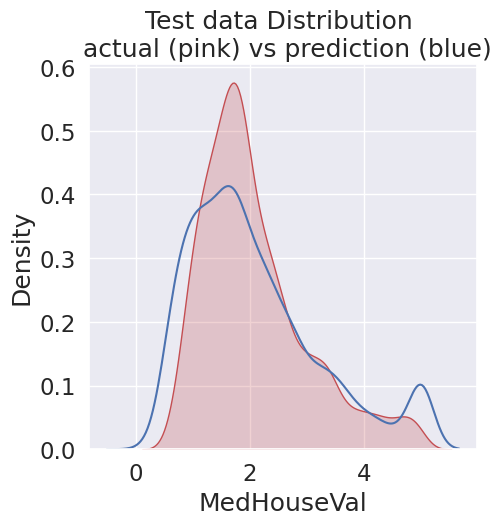

In [ ]:
# test sample distribution actual vs prediction
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.kdeplot(y_test,color='b')
sns.kdeplot(rf_pred_te,shade=True,color='r')
plt.title("Test data Distribution \n actual (pink) vs prediction (blue)");

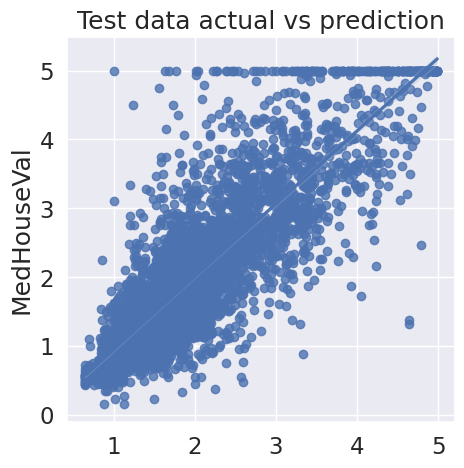

In [ ]:
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.regplot(y=y_test,x=rf_pred_te)
plt.title("Test data actual vs prediction");

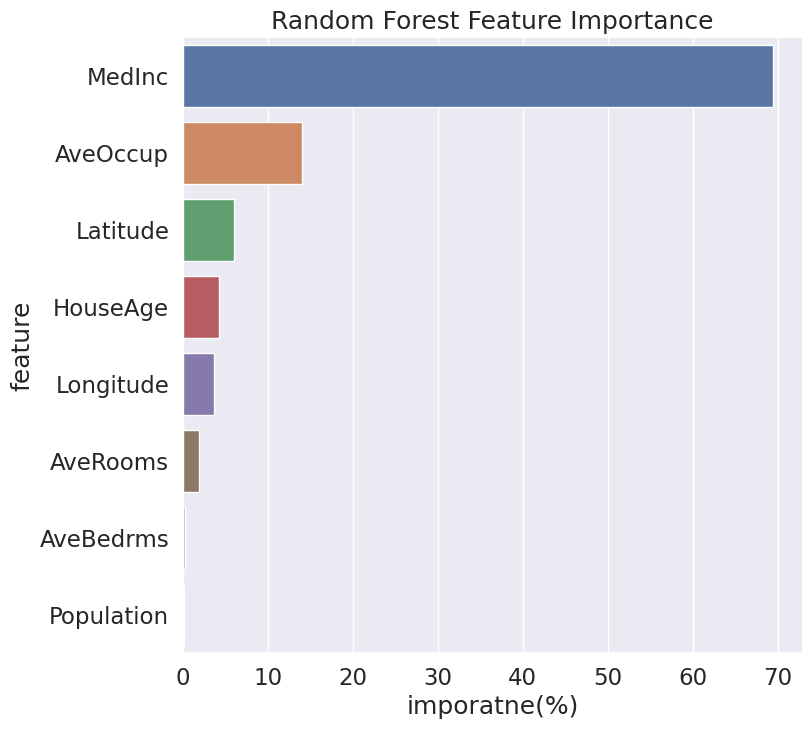

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf, X_train, y_train, n_repeats=15, random_state=123, n_jobs=2)
forest_importances = pd.DataFrame(np.abs(result.importances_mean), index=X_train.columns).reset_index()
forest_importances.columns = ['feature','importance']
forest_importances['imporatne(%)'] = np.round(100*forest_importances.importance / forest_importances.importance.sum(),2)
forest_importances =  forest_importances.sort_values(by='imporatne(%)',ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(data=forest_importances, y='feature',x='imporatne(%)').set(title='Random Forest Feature Importance');

**Ensemble**

In [ ]:
#voting ensemble

from sklearn.ensemble import VotingRegressor

estimators = [
    ('ols', ols),
    ('dt',dt),
    ('rf',rf)
]

ens_vot = VotingRegressor(estimators=estimators)

ens_vot.fit(X_train, y_train)

VotingRegressor(estimators=[('ols', LinearRegression()),
                            ('dt',
                             DecisionTreeRegressor(max_depth=7,
                                                   random_state=123)),
                            ('rf',
                             RandomForestRegressor(max_depth=7,
                                                   min_samples_leaf=20,
                                                   n_estimators=200,
                                                   random_state=123))])

In [ ]:
ens_vot_pred_tr = ens_vot.predict(X_train)
ens_vot_pred_te = ens_vot.predict(X_test)

pd.concat([eval_metrics('ols','train',y_train,ens_vot_pred_tr),
           eval_metrics('ols','test',y_test,ens_vot_pred_te)],
          ignore_index=True, axis=0)

model sample   rmse    mae  max_e     r2
0   ols  train  0.351  0.426  3.660  0.736
1   ols   test  0.389  0.445  4.287  0.708

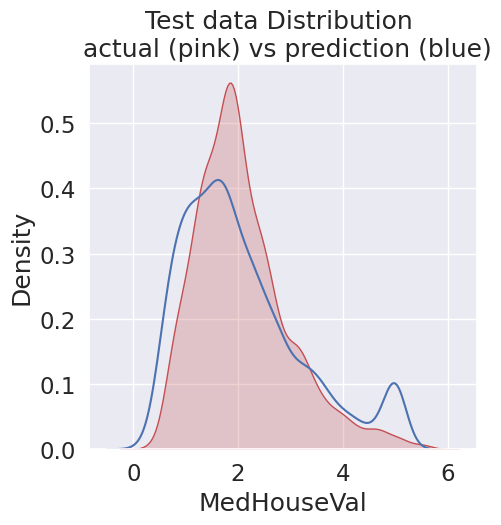

In [ ]:
# test sample distribution actual vs prediction
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.kdeplot(y_test,color='b')
sns.kdeplot(ens_vot_pred_te,shade=True,color='r')
plt.title("Test data Distribution \n actual (pink) vs prediction (blue)");

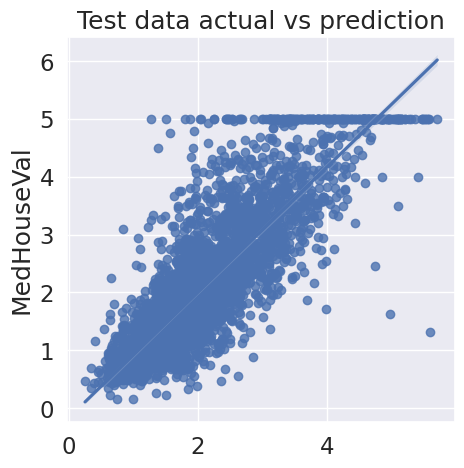

In [ ]:
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.regplot(y=y_test,x=ens_vot_pred_te)
plt.title("Test data actual vs prediction");

### **Summary**

The Random forest regressor seems to yield the best performance across both training and test samples (explain why?). It is therefore a good candidte as a model to estimate house value using its characteristics. Let's carry out a simple residual analysis to further evaluate the outcome of this model.

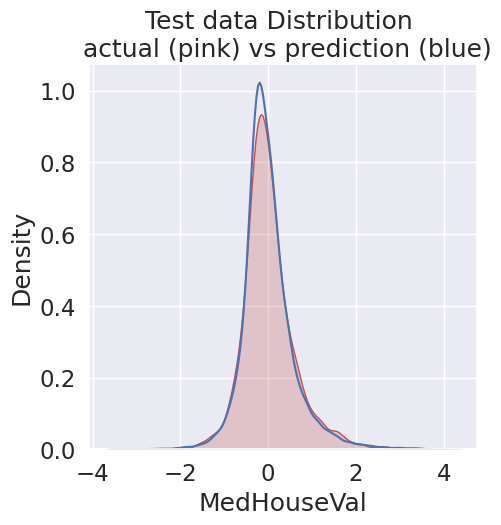

In [ ]:
#Calculate the residuals for both training and test data
rf_resid_tr = y_train - rf_pred_tr
rf_resid_te = y_test - rf_pred_te

# test sample distribution actual vs prediction
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.kdeplot(rf_resid_tr,color='b')
sns.kdeplot(rf_resid_te,shade=True,color='r')
plt.title("Test data Distribution \n actual (pink) vs prediction (blue)");

In [ ]:
rf_resid_tr.describe()

count    16512.000000
mean         0.000739
std          0.576662
min         -3.343422
25%         -0.320637
50%         -0.077785
75%          0.240206
max          3.516514
Name: MedHouseVal, dtype: float64

In [ ]:
rf_resid_te.describe()

count    4128.000000
mean        0.012011
std         0.611636
min        -3.325870
25%        -0.327675
50%        -0.071875
75%         0.263444
max         4.005741
Name: MedHouseVal, dtype: float64

The residuals are approximately symmetrically distributed around the mean of zero, as expected. The average income, average occupancy and latitude (as proxy for the location) are among the top predictors of the house value. This analysis may ideally utilize additional data items related to the crime rates, proximity to shopping areas, and historical values and trends, and changes in the local real estate market as a way to improve such analysis. It is essential to carefully review and validate the outcome of a predictive using domain knowledge and expertise to ensure not only statistical significance of results, but also business domain sensibility and substance. The above example, is a simple use case of data driven processes that are increasingly utilized by real estate and prop-tech firms. As a way forward, students may research other use cases of AI and ML in real estate.